In [13]:
import os
import sys

import awkward as ak
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sys.path.append(os.path.abspath('../'))

from source.data import opendata

sns.set_theme()

Loading Top Quark dataset from mode: train, is_signal_new: 1
Loading Top Quark dataset from mode: train, is_signal_new: 0


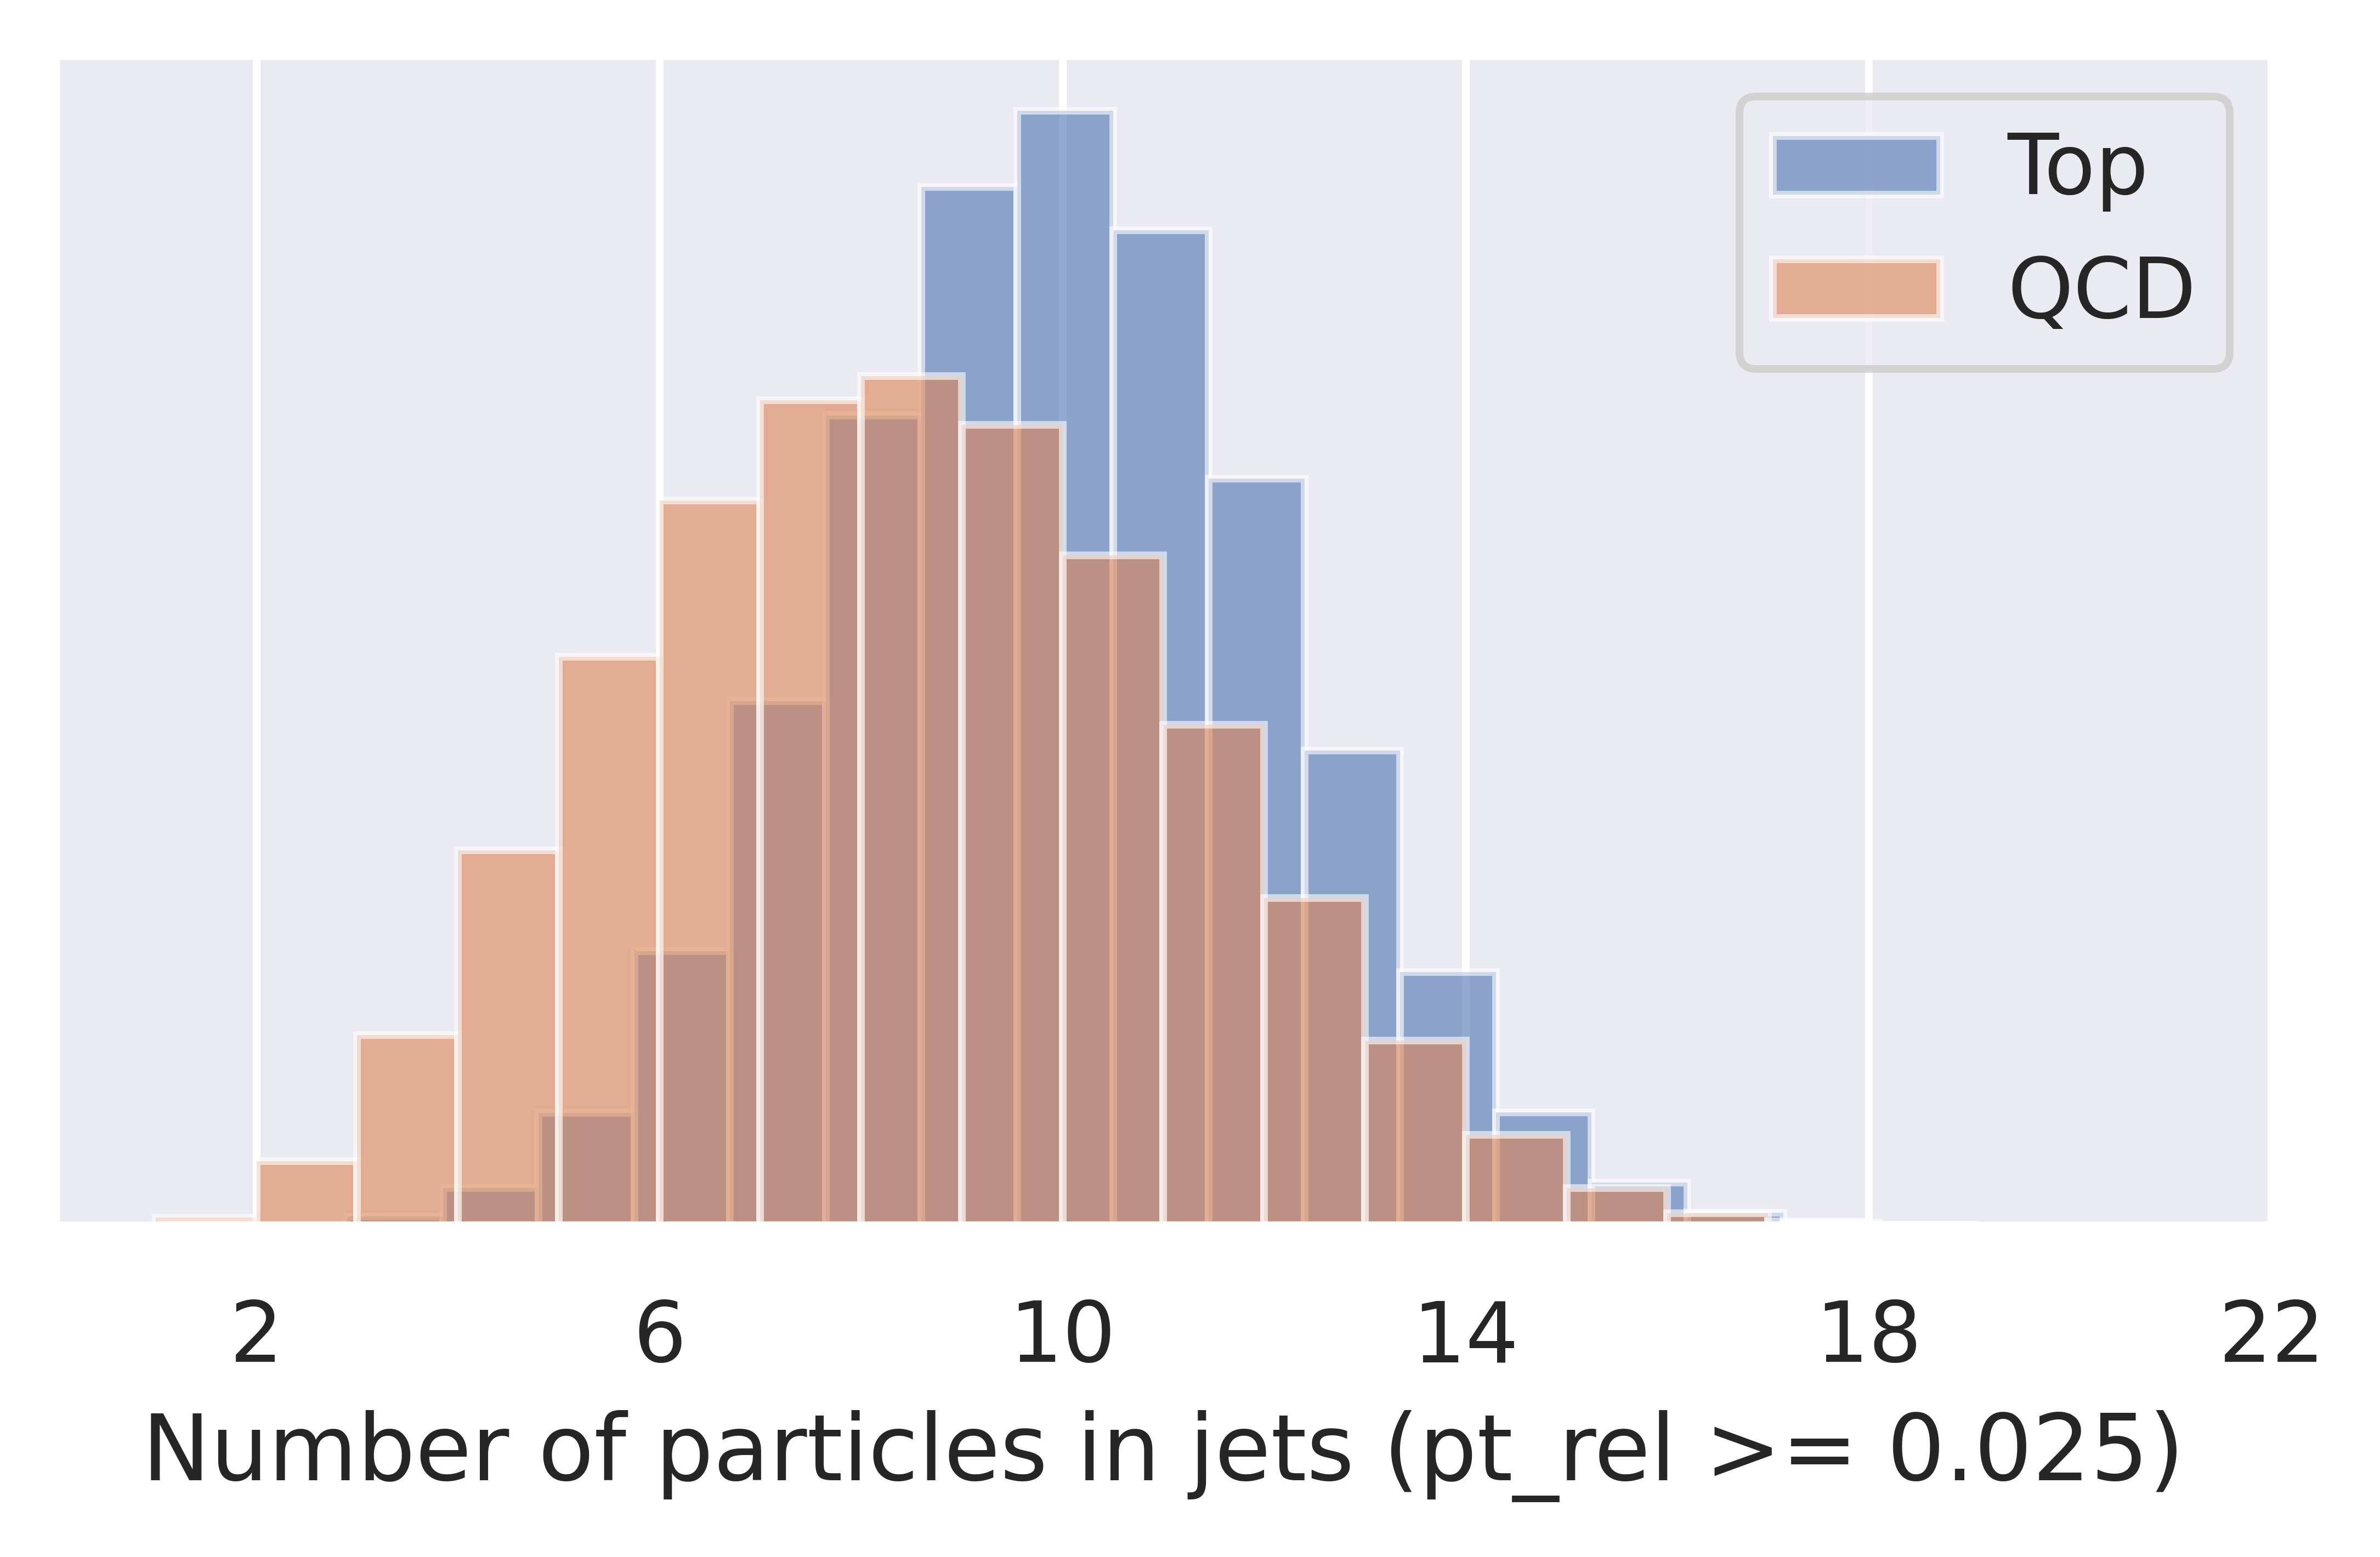

In [14]:
pt_threshold = 0.025

# channel_list = ['g', 'q', 't', 'w', 'z']
# fatjet_list = [opendata.JetNetEvents(channel, pt_threshold=pt_threshold, pt_min=800, pt_max=1200).events for channel in channel_list]

channel_list = ['Top', 'QCD']
fatjet_list = [
    opendata.TopQuarkEvents(mode='train', is_signal_new=1, pt_threshold=pt_threshold, pt_min=550, pt_max=650).events,
    opendata.TopQuarkEvents(mode='train', is_signal_new=0, pt_threshold=pt_threshold, pt_min=550, pt_max=650).events,
]

fig, ax = plt.subplots(figsize=(4.5, 3), dpi=1000)

def draw_jet_eflow_distribution(
        feature: str,
        bins: int,
    ):
    """Draw distribution of jet energy flow information.
    
    Args:
        row_ax : Axes object
            One of the row of 2D axes object.
        feature : str
            The feature of jet to be drawed (pt, eta, or phi).
        bins : int
            Number of bins of the histogram.
    """
    
    # Will determine the range for y-axis depending on the feature values.
    yrange = [0, 0]
    
    for i in range(len(channel_list)):
        # One of the channel events.
        events = fatjet_list[i]

        # `plt` needs to convert `ak.Array` to `np.array`
        data = ak.to_numpy(events[feature])

        # The 0-th column plots the total overlapped histogram.
        pdf, _, _ = ax.hist(
            x=data,
            bins=bins,
            label=channel_list[i],
            alpha=0.6,
            density=True
        )

        # Update the values for y_range such that the scale for each channel is
        # the same.
        yrange[1] = max(yrange[1], max(pdf))
    
    # Rescale the `yrange` value a bit more higher.
    yrange[1] *= 1.1

    for i in range(len(channel_list)):
        # Altogether column.
        # ax.set_title('Histogram of # of ptcs in fat-jets (pt_rel > 0.025)')
        if pt_threshold != 0:
            ax.set_xlabel(f"Number of particles in jets (pt_rel >= {pt_threshold})")
            ax.set_xticks([2, 6, 10, 14, 18, 22])
        else:
            ax.set_xlabel(f"Number of particles in jets")
        # ax.set_ylabel('Density')
        # ax.set_ylim(yrange)
        ax.set_yticks([])
        ax.legend()

draw_jet_eflow_distribution('fatjet_num_ptcs', bins=20)
plt.tight_layout()